<div align="center">

### TALLER #1 SEÑALES Y SISTEMAS - 2025 2S
#### Estudiante: Martín Ramírez Espinosa
##### Departamento de Ingeniería Eléctrica, Electrónica y Computación
##### Universidad Nacional de Colombia - Sede Manizales

</div>

<a href="https://colab.research.google.com/github/AlmondSund/SyS_2025_2/blob/main/Taller1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Nivelación Python

#### 1.1. Realizar y aprobar los cursos Intro to Programming y Python de Kaggle:

<div>
  <strong>Certificado Intro to Programming:</strong><br>
  <img src="Martín Ramírez Espinosa - Intro to Programming.png" alt="Intro to Programming Certificate" width="400">
  <br><strong>Certificado Python:</strong><br>
  <img src="Martín Ramírez Espinosa - Python.png" alt="Python Certificate" width="400">
</div>

#### 1.2. Consultar y realizar los ejercicios de los cuadernos 1 al 8 del repositorio Python Basics.

##### 1.2.1. Variables

- Write a program that displays the result of the following arithmetic operation on the screen: $x(t) = \left(\frac{3+2}{2.5}\right)^2$

In [1]:
x_t = ((3 + 2) / (2 * 5)) ** 2
x_t

0.25

- Write a program that asks the user for the number of hours worked and the hourly rate. Then, it should display on the screen the corresponding payment.

In [2]:
num_hours_worked = int(input("Enter the number of hours worked: "))
hourly_rate = float(input("Enter the hourly rate: "))
weekly_salary = num_hours_worked * hourly_rate
print("Weekly salary:", weekly_salary)

ValueError: invalid literal for int() with base 10: ''

- Write a program that asks the user for their weight (in kg) and height (in meters), calculates the body mass index (BMI), stores it in a variable, and displays the message "Your body mass index is imc" on the screen, where imc is the calculated BMI rounded to two decimal places.

In [ ]:
weight_kg = float(input("Enter your weight in kilograms: "))
height_m = float(input("Enter your height in meters: "))
bmi = weight_kg / (height_m ** 2)
print("Your BMI is:", bmi)

Your BMI is: 1.0


##### 1.2.2. Conditionals

- In order to pay a certain tax, you must be over 16 years old and have a monthly income equal to or greater than €1000. Write a program that asks the user for their age and monthly income, and displays whether the user has to pay the tax or not.

In [ ]:
usr_age_years = int(input("Enter your age (years): "))
usr_income_euros = float(input("Enter your monthly income (euros): "))
if usr_age_years > 16 and usr_income_euros >= 1000:
    print("You have to pay the tax.")
else:
    print("You do not have to pay the tax.")

You do not have to pay the tax.


- The Bella Napoli pizzeria offers vegetarian and non-vegetarian pizzas to its customers. The ingredients for each type of pizza are as follows:

Vegetarian ingredients: Bell peppers and tofu.

Non-vegetarian ingredients: Pepperoni, Ham, and Salmon.

Write a program that asks the user if they want a vegetarian pizza or not, and based on their response, displays a menu with the available ingredients for them to choose from. Only one additional ingredient can be chosen besides the mozzarella and tomato, which are included in all pizzas. Finally, the program should display whether the chosen pizza is vegetarian or not, along with all the ingredients it contains.

In [ ]:
print("Welcome to Bella Napoli Pizzeria!")
is_vegetarian = input("Do you want a vegetarian pizza? (Y/N): ").strip().upper()

if is_vegetarian == 'Y':
    print("Available vegetarian ingredients: 1. Bell peppers 2. Tofu")
    choice = input("Choose one ingredient (1 or 2): ").strip()
    if choice == '1':
        ingredient = "Bell peppers"
    elif choice == '2':
        ingredient = "Tofu"
    else:
        ingredient = "No additional ingredient"
    pizza_type = "Vegetarian"

elif is_vegetarian == 'N':
    print("Available non-vegetarian ingredients: 1. Pepperoni 2. Ham 3. Salmon")
    choice = input("Choose one ingredient (1, 2, or 3): ").strip()
    if choice == '1':
        ingredient = "Pepperoni"
    elif choice == '2':
        ingredient = "Ham"
    elif choice == '3':
        ingredient = "Salmon"
    else:
        ingredient = "No additional ingredient"
    pizza_type = "Non-Vegetarian"

else:
    pizza_type = "Unknown"
    ingredient = "No additional ingredient"

print("You have ordered a", pizza_type, "pizza with the following ingredients:")
print("Mozzarella")
print("Tomato")
print(ingredient)

Welcome to Bella Napoli Pizzeria!
Available vegetarian ingredients: 1. Bell peppers 2. Tofu
Available vegetarian ingredients: 1. Bell peppers 2. Tofu
You have ordered a Vegetarian pizza with the following ingredients:
Mozzarella
Tomato
Bell peppers
You have ordered a Vegetarian pizza with the following ingredients:
Mozzarella
Tomato
Bell peppers


##### 1.2.3. Loops

- Write a code that ask the user to enter an integer number every time, and the process will be repeated with more numbers until the user enters a zero.
At the end (when the zero is entered), show the amount of numbers entered.

In [ ]:
count = 0
while True:
    number = int(input("Enter an integer number (0 to stop): "))
    if number == 0:
        break
    count += 1
print("Total numbers entered:", count)

Total numbers entered: 9


- Use the input() function to ask for the user to enter one integer number. Only if the number is even, it will be accumulated.
The program must come to an end if the sum of the numbers surpasses 50 or if the user enters a maximum of 10 numbers.

In [ ]:
total_sum = 0
count = 0
while (total_sum <= 50) or (count < 10):
    number = int(input("Enter an integer number: "))
    if number % 2 == 0:
        total_sum += number
    count += 1

##### 1.2.4. IntroNumpy

None

##### 1.2.5. Functions

- The area of a triangle can be calculated when the length of its sides is known. Taking into account that s1, s2 and s3 are the lengths of the sides of the triangle, the subperimeter s = (s1+s2+s3)/2 can be calculated, and, with this value, the area of the triangle can be calculated from the follows: area = √( s * (s-s1) * (s-s2) * (s-s3) ).

Create a function that takes the length of the sides of the triangle and returns the area of the triangle, rounded to one decimal place.

The math module can help you calculate the square root.

In [ ]:
import math

def calculate_triangle_area(s1, s2, s3):
    s = (s1 + s2 + s3) / 2
    area = math.sqrt(s * (s - s1) * (s - s2) * (s - s3))
    return round(area, 1)

- Create a function that can calculate a person's body mass index (BMI).

The formula to calculate BMI is as follows:

BMI = weight/(height^2)

In this formula the weight is in kilograms and the height in meters. Note that the weight and height received by your function will be in pounds and inches respectively, since your function will be used in the United States.

Remember that:

- 1 pound corresponds to 0.45kg.

- 1 inch corresponds to 0.025 meters.

The return value must be rounded to two decimal places.

In [ ]:
def calculate_bmi(weight_pounds, height_inches):
    weight_kg = weight_pounds * 0.45
    height_m = height_inches * 0.025
    bmi = weight_kg / (height_m ** 2)
    return round(bmi, 2)

##### 1.2.6. PythonDataTypesStructures

- Write a function that takes a list of numbers as input and returns the sum of all the odd numbers in the list. For example, if the input is [1, 2, 3, 4, 5, 6], the function should return 9 (which is the sum of 1, 3, and 5).

In [ ]:
def sum_of_odd_numbers(numbers):
    sum_odd = 0
    for num in numbers:
        if num % 2 != 0:
            sum_odd += num
    return sum_odd

- Write a function that takes a list of words as input and returns a dictionary that counts the number of times each word appears in the list. For example, if the input is ['apple', 'banana', 'apple', 'cherry', 'cherry', 'cherry'], the function should return {'apple': 2, 'banana': 1, 'cherry': 3}.

In [ ]:
def count_word_occurrences(words):
    word_count = {}
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

##### 1.2.7. Clases

- Crea una clase "Persona" que tenga atributos como nombre, edad, género y métodos para presentarse y saludar a otras personas.

In [ ]:
class Persona:
    def __init__(self, nombre, edad, genero):
        self.nombre = nombre
        self.edad = edad
        self.genero = genero

    def presentarse(self):
        return f"Hola, mi nombre es {self.nombre}, tengo {self.edad} años y soy {self.genero}."

    def saludar(self, otra_persona):
        return f"Hola {otra_persona.nombre}, mucho gusto en conocerte."

- Crea una clase "Coche" que tenga atributos como marca, modelo, año, kilometraje y métodos para arrancar, acelerar y frenar.

In [ ]:
class Coche:
    def __init__(self, marca, modelo, año, kilometraje):
        self.marca = marca
        self.modelo = modelo
        self.año = año
        self.kilometraje = kilometraje

    def arrancar(self):
        return f"El coche {self.marca} {self.modelo} ha arrancado."

    def acelerar(self, incremento):
        self.kilometraje += incremento
        return f"El coche {self.marca} {self.modelo} ha acelerado. Kilometraje actual: {self.kilometraje} km."

    def frenar(self):
        return f"El coche {self.marca} {self.modelo} ha frenado."

- Crea una clase "Rectángulo" que tenga atributos como longitud y ancho y métodos para calcular el área y el perímetro.

In [ ]:
class Rectangulo:
    def __init__(self, longitud, ancho):
        self.longitud = longitud
        self.ancho = ancho

    def calcular_area(self):
        return self.longitud * self.ancho

    def calcular_perimetro(self):
        return 2 * (self.longitud + self.ancho)

- Crea una clase "Banco" que tenga atributos como nombre, dirección y métodos para abrir una cuenta, depositar dinero, retirar dinero y revisar el saldo.

In [ ]:
class Banco:
    def __init__(self, nombre, direccion):
        self.nombre = nombre
        self.direccion = direccion
        self.cuentas = {}

    def abrir_cuenta(self, titular, saldo_inicial=0):
        if titular in self.cuentas:
            return "La cuenta ya existe."
        self.cuentas[titular] = saldo_inicial
        return f"Cuenta abierta para {titular} con saldo inicial de {saldo_inicial}."

    def depositar(self, titular, cantidad):
        if titular not in self.cuentas:
            return "La cuenta no existe."
        if cantidad <= 0:
            return "La cantidad a depositar debe ser positiva."
        self.cuentas[titular] += cantidad
        return f"Depósito de {cantidad} realizado. Nuevo saldo: {self.cuentas[titular]}."

    def retirar(self, titular, cantidad):
        if titular not in self.cuentas:
            return "La cuenta no existe."
        if cantidad <= 0:
            return "La cantidad a retirar debe ser positiva."
        if cantidad > self.cuentas[titular]:
            return "Fondos insuficientes."
        self.cuentas[titular] -= cantidad
        return f"Retiro de {cantidad} realizado. Nuevo saldo: {self.cuentas[titular]}."

    def revisar_saldo(self, titular):
        if titular not in self.cuentas:
            return "La cuenta no existe."
        return f"El saldo de la cuenta de {titular} es: {self.cuentas[titular]}."

- Crea una clase "Estudiante" que tenga atributos como nombre, edad, promedio y métodos para estudiar, hacer tareas y presentar exámenes.

In [ ]:
"""Crea una clase "Estudiante" que tenga atributos como nombre, edad, promedio y métodos para estudiar, hacer tareas y presentar exámenes."""
class Estudiante:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad
        self.promedio = 0

    def estudiar(self, materia):
        return f"{self.nombre} está estudiando {materia}."

    def hacer_tarea(self, materia):
        return f"{self.nombre} está haciendo la tarea de {materia}."

    def presentar_examen(self, materia):
        return f"{self.nombre} está presentando el examen de {materia}."

##### 1.2.8. Herencias

- Crea un sistema de manejo de figuras geométricas utilizando clases y herencia. Debes tener una clase base llamada "FiguraGeometrica" con un método abstracto llamado "calcular_area()". Luego, crea clases derivadas para diferentes tipos de figuras geométricas, como "Círculo", "Rectángulo" y "Triángulo". Cada clase derivada debe implementar el método "calcular_area()" de acuerdo con la fórmula correspondiente para el cálculo del área de esa figura.

In [ ]:
import math

class FiguraGeometrica:
    def calcular_area(self):
        raise NotImplementedError("Este método debe ser implementado por las clases derivadas.")

class Circulo(FiguraGeometrica):
    def __init__(self, radio):
        self.radio = radio

    def calcular_area(self):
        return math.pi * (self.radio ** 2)

class Rectangulo(FiguraGeometrica):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def calcular_area(self):
        return self.base * self.altura

class Triangulo(FiguraGeometrica):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def calcular_area(self):
        return 0.5 * self.base * self.altura

- Crea un sistema de reserva de vuelos utilizando clases y herencia. Debes tener una clase base llamada "Vuelo" con los siguientes atributos: número de vuelo, origen, destino, y capacidad máxima de pasajeros. Luego, crea una clase derivada llamada "VueloEconomico" que herede de la clase base y agregue un atributo adicional llamado "tarifa". Además, agrega métodos en ambas clases para mostrar la información del vuelo y realizar una reserva de asientos.

La clase base "Vuelo" debe tener un método para verificar si hay asientos disponibles y otro para realizar la reserva de un asiento. La clase derivada "VueloEconomico" puede tener métodos adicionales para calcular el precio total de la reserva de acuerdo con la tarifa y la cantidad de asientos reservados.

In [ ]:
class Vuelo:
    def __init__(self, numero_vuelo, origen, destino, capacidad_maxima):
        self.numero_vuelo = numero_vuelo
        self.origen = origen
        self.destino = destino
        self.capacidad_maxima = capacidad_maxima
        self.asientos_reservados = 0

    def mostrar_informacion(self):
        return (f"Vuelo {self.numero_vuelo} de {self.origen} a {self.destino}. "
                f"Capacidad máxima: {self.capacidad_maxima}, Asientos reservados: {self.asientos_reservados}")

    def hay_asientos_disponibles(self):
        return self.asientos_reservados < self.capacidad_maxima

    def reservar_asiento(self):
        if self.hay_asientos_disponibles():
            self.asientos_reservados += 1
            return "Asiento reservado con éxito."
        else:
            return "No hay asientos disponibles."
        
class VueloEconomico(Vuelo):
    def __init__(self, numero_vuelo, origen, destino, capacidad_maxima, tarifa):
        super().__init__(numero_vuelo, origen, destino, capacidad_maxima)
        self.tarifa = tarifa

    def calcular_precio_total(self, cantidad_asientos):
        if cantidad_asientos <= 0:
            return "La cantidad de asientos debe ser positiva."
        return self.tarifa * cantidad_asientos

    def mostrar_informacion(self):
        info_base = super().mostrar_informacion()
        return f"{info_base}, Tarifa económica: {self.tarifa} por asiento."

### 2. Conceptos básicos de señales

#### 2.1. Consultar y realizar los ejercicios propuestos en el cuaderno de Colab: 1_IntroNumpy_SyS.ipynb

- Se tiene un microprocesador de 4 bits con entrada análoga entre -3.3 y 3.3 [V]. Describa las condiciones necesarias para que el microprocesador pueda digitalizar la señal $x(t) = 30cos(100πt)$ . Presente una simulación en Python de dicho proceso para tres ciclos de la señal $x(t)$.

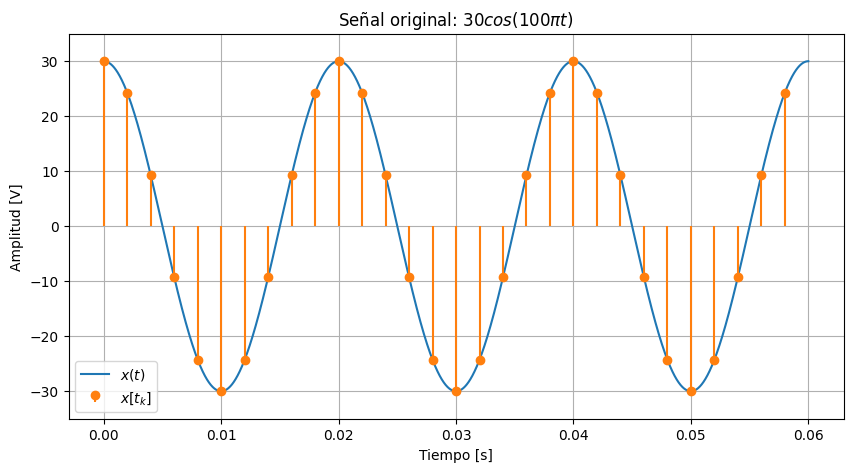

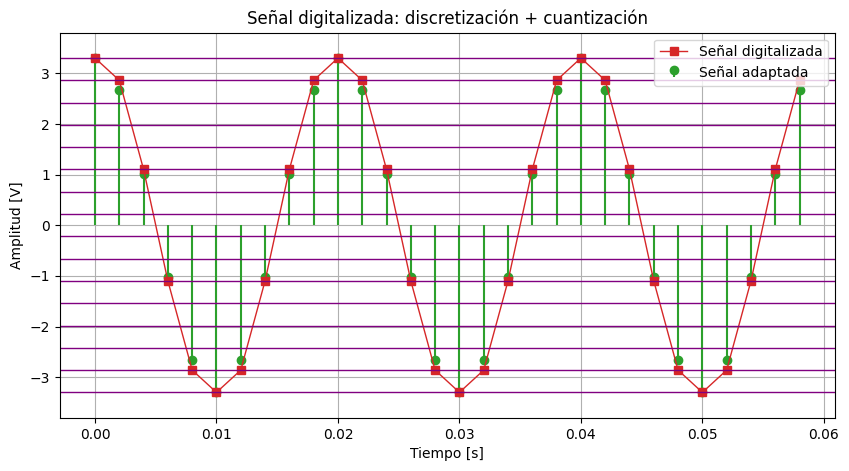

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""Parámetros de la señal"""
A = 30.0       # Amplitud [V]
F = 50.0       # Frecuencia [Hz] (100π rad/s => 50 Hz)
T = 1.0/F      # Periodo [s]

"""Muestreo"""
F_s = 10*F     # Frecuencia de muestreo [Hz], por Teorema de Nyquist (F_s >= 2*F)
T_s = 1.0/F_s  # Periodo de muestreo [s]

"""Tiempos [s]"""
sim_time = 3*T                      # Tiempo de simulación (3 ciclos)
t = np.linspace(0, sim_time, 20000) # Tiempo continuo
t_k = np.arange(0, sim_time, T_s)   # Tiempo discreto

"""Señal original [V]"""
x_t = A*np.cos(2*np.pi*F*t)         # Señal continua
x_tk = A*np.cos(2*np.pi*F*t_k)      # Señal muestreada

"""Parámetros del A/D"""
V_min, V_max = -3.3, 3.3    # Rango de voltaje del A/D [V]
n_bits = 4                  # Número de bits del A/D
num_levels = 2**n_bits      # Número de niveles de cuantización

"""Adaptación de la señal para que entre en el rango del A/D"""
gain = V_max/A                  # Pendiente de la recta de adaptación [V/V]
offset = (V_max + V_min) / 2    # Cero de la recta de adaptación [V]
x_tk_adj = gain*x_tk + offset   # Señal adaptada [V]

"""Cuantización"""
levels = np.linspace(V_min, V_max, num_levels)            # Niveles de cuantización
distances = np.abs(x_tk_adj[:, None] - levels[None, :])   # Matriz que contiene todas las distancias a cada nivel
indices = np.argmin(distances, axis=1)                    # Mínima distancia por cada fila (axis=1 -> filas)
x_tk_q = levels[indices]                                  # Señal digitalizada

"""Visualización"""
# Gráfica 1: Señal original continua y discreta
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label='$x(t)$', color='C0')
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.title('Señal original: $30cos(100\\pi t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-35, 35)
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Gráfica 2: Señal adaptada, cuantizada y niveles de cuantización (A/D)
plt.figure(figsize=(10, 5))
plt.stem(t_k, x_tk_adj, label='Señal adaptada', linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.plot(t_k, x_tk_q, label='Señal digitalizada', color='C3', marker='s', linestyle='-', linewidth=1)
# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)
plt.title('Señal digitalizada: discretización + cuantización')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(V_min-0.5, V_max+0.5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

#### 2.2. Consultar y realizar los ejercicios propuestos en el cuaderno de Colab: 2_Señales_estandar.ipynb

- Use la función $rect(t)$ para construir una función $cos(ωt)$ con $ω = 2$, la cual se enciende en $t = -\frac{1}{2}$ y se apaga en $t = \frac{1}{2}$

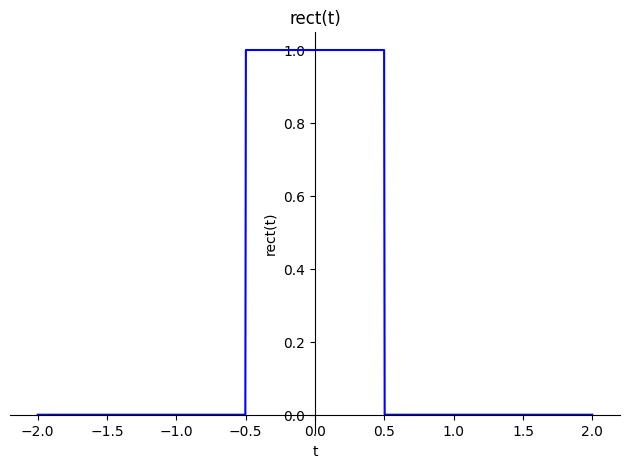

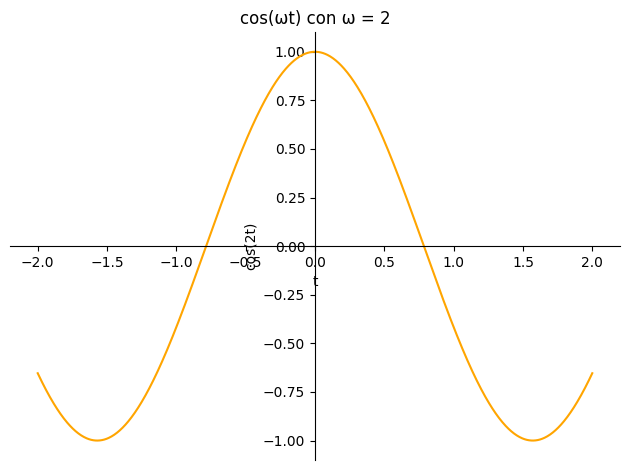

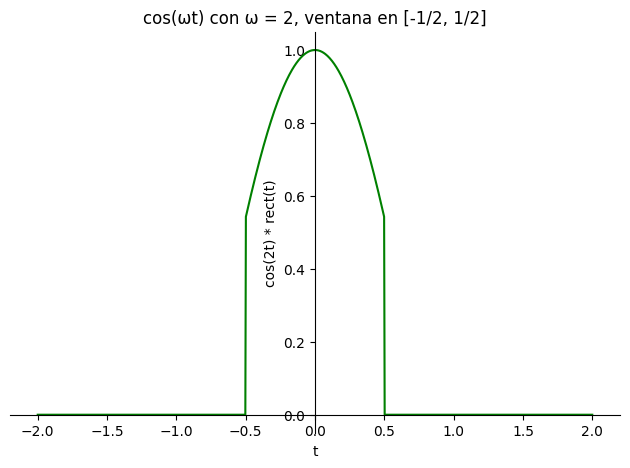

La función resultante es:


Piecewise((cos(2*t), (t >= -0.5) & (t <= 0.5)), (0, True))

In [ ]:
import sympy as sp

# Definición de la variable independiente
t = sp.symbols('t', real=True)

# Definición de la función rect(t)
rect = sp.Piecewise((1, (t >= -1/2) & (t <= 1/2)), (0, True)) # rect(t) = 1 si -1/2 <= t <= 1/2, 0 en otro caso
sp.plot(rect, (t, -2, 2), title='rect(t)', ylabel='rect(t)', xlabel='t', line_color='blue')

# Construcción de la función cos(ωt) con ω = 2
cos_omega_t = sp.cos(2 * t)
sp.plot(cos_omega_t, (t, -2, 2), title='cos(ωt) con ω = 2', ylabel='cos(2t)', xlabel='t', line_color='orange')

# Construcción de la función cos(ωt) que se enciende en t = -1/2 y se apaga en t = 1/2
cos_windowed = cos_omega_t * rect
sp.plot(cos_windowed, (t, -2, 2), title='cos(ωt) con ω = 2, ventana en [-1/2, 1/2]', ylabel='cos(2t) * rect(t)', xlabel='t', line_color='green')

# Simbolicamente:
print( "La función resultante es:")
cos_windowed.simplify()

- Genere un rectificador de onda completa utilizando la función $sgn(t)$

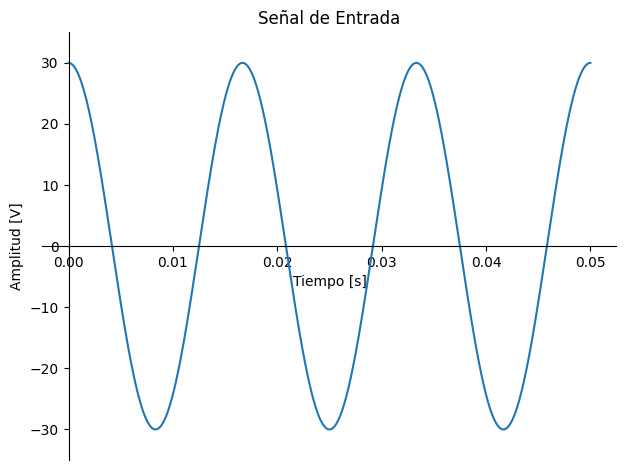

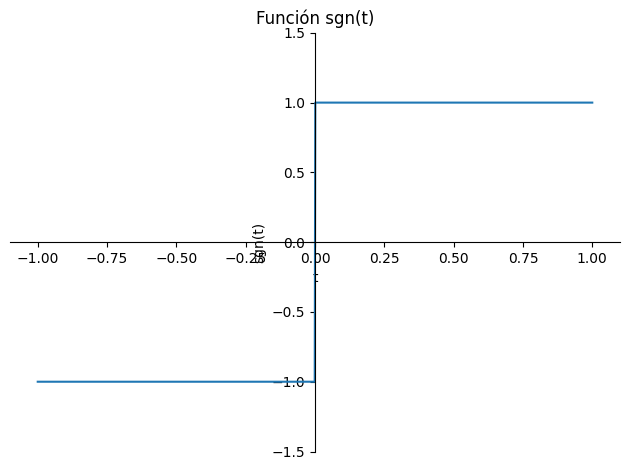

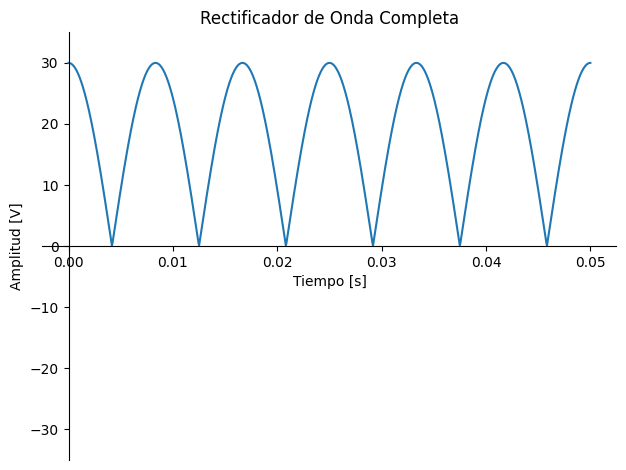

A*cos(2*pi*F*t)*sign(A*cos(2*pi*F*t))

In [ ]:
import sympy as sp

# Definición de la variable independiente
t = sp.symbols('t', real=True)

# Definición de los parámetros de la señal
A, F = sp.symbols('A F', real=True) # Amplitud y frecuencia

# Señal de entrada
x_t = A * sp.cos(2 * sp.pi * F * t)
sp.plot(x_t.subs({A: 30, F: 60}), (t, 0, 0.05), title='Señal de Entrada', ylabel='Amplitud [V]', xlabel='Tiempo [s]', ylim=(-35, 35))

# Función sgn(t)
sp.plot(sp.sign(t), (t, -1, 1), title='Función sgn(t)', ylabel='sgn(t)', xlabel='t', ylim=(-1.5, 1.5))

# Señal de salida (rectificada)
abs_x_t = x_t * sp.sign(x_t)

# Graficar la señal rectificada
sp.plot(abs_x_t.subs({A: 30, F: 60}), (t, 0, 0.05), title='Rectificador de Onda Completa', ylabel='Amplitud [V]', xlabel='Tiempo [s]', ylim=(-35, 35))

# Simbolicamente:
abs_x_t


#### 2.3. Consultar y realizar los ejercicios propuestos en el cuaderno de Colab: 3_Operaciones_señales_continuas.ipynb

- Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior

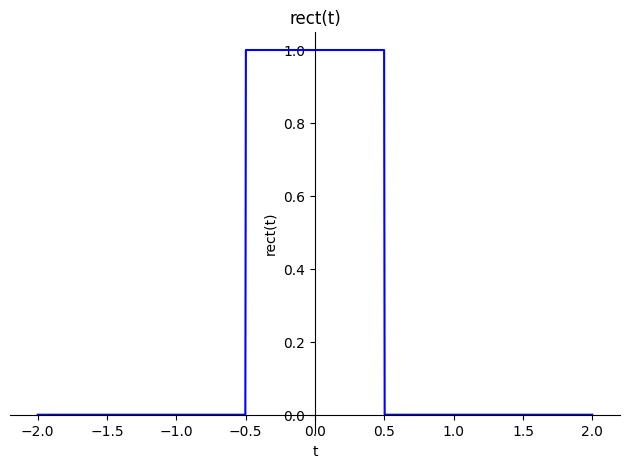

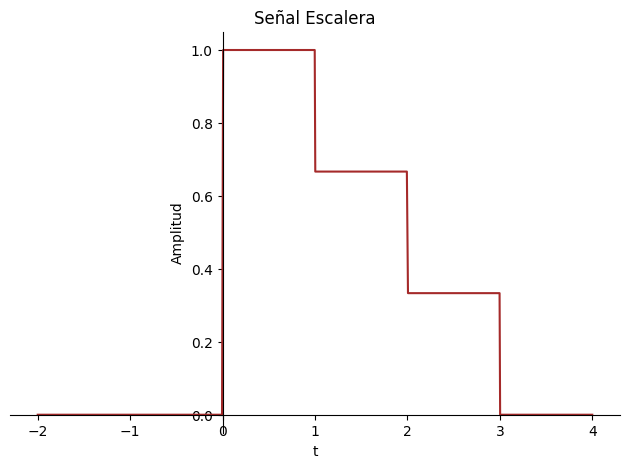

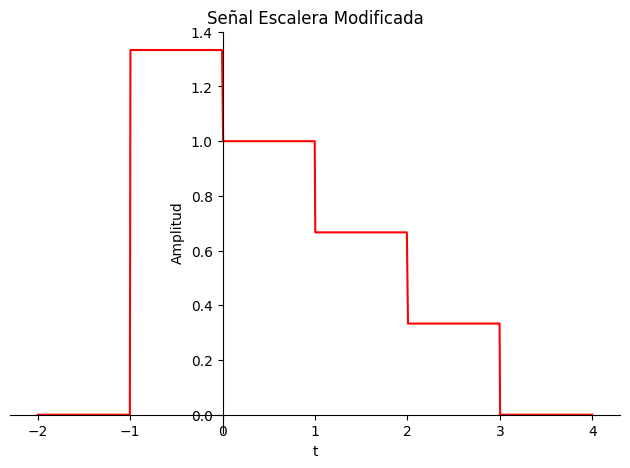

In [ ]:
import sympy as sp

# Definición de la variable independiente
t = sp.symbols('t', real=True)

# Definición de la función rect(t) por medio de funciones escalón unitario
rect = sp.Heaviside(t + 0.5) - sp.Heaviside(t - 0.5)  # rect(t) = u(t + 1/2) - u(t - 1/2)
sp.plot(rect, (t, -2, 2), title='rect(t)', ylabel='rect(t)', xlabel='t', line_color='blue')

# Definición de una señal escalera dada por la superposición y desplazamiento de funciones rect(t)
staircase = rect.subs(t, t-1/2) + 2/3 * rect.subs(t, t-3/2) + 1/3 * rect.subs(t, t-5/2)
sp.plot(staircase, (t, -2, 4), title='Señal Escalera', ylabel='Amplitud', xlabel='t', line_color='brown')

# Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior
staircase_modified = 4/3 * rect.subs(t, t+1/2) + staircase # Superposición del nuevo escalón con la señal escalera original
sp.plot(staircase_modified, (t, -2, 4), title='Señal Escalera Modificada', ylabel='Amplitud', xlabel='t', line_color='red')


- Modifique el ejemplo anterior para que:
    - La señal se comprima.
    - La señal se escale y se invierta.

¿Qué factor de escalamiento 'a' da como resultado un estiramiento/compresión en este contexto?

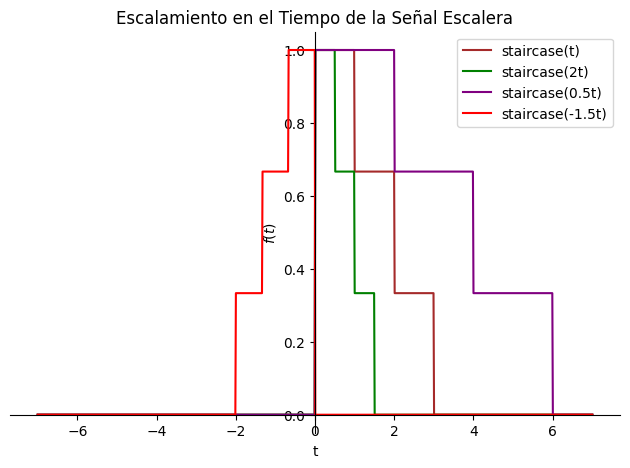

In [ ]:
# Definición del parámetro de escalamiento
a = sp.symbols('a', real=True)

# Definición de la función staircase(a*t)
staircase_a_t = staircase.subs(t, a*t)

# Señal comprimida (a > 1)
staircase_a_t_compressed = staircase_a_t.subs(a, 2)

# Señal expandida (0 < a < 1)
staircase_a_t_expanded = staircase_a_t.subs(a, 0.5)

# Señal escalada e invertida (a < 0)
staircase_a_t_inverted = staircase_a_t.subs(a, -1.5)

# Comparación de la señal original con las señales escaladas en tiempo con diferentes valores de 'a'
plt_staircases = sp.plot(staircase, (t, -7, 7), show=False, line_color='brown', legend=True, label='staircase(t)')
plt_staircases.extend(sp.plot(staircase_a_t_compressed, (t, -7, 7), show=False, line_color='green', legend=True, label='staircase(2t)'))
plt_staircases.extend(sp.plot(staircase_a_t_expanded, (t, -7, 7), show=False, line_color='purple', legend=True, label='staircase(0.5t)'))
plt_staircases.extend(sp.plot(staircase_a_t_inverted, (t, -7, 7), show=False, line_color='red', legend=True, label='staircase(-1.5t)'))
plt_staircases.title = 'Escalamiento en el Tiempo de la Señal Escalera'
plt_staircases.xlabel = 't'
plt_staircases.show()

- ¿Para qué valor de $\tau$ la señal comienza en $t = 0$?

- Realice un cambio temporal dividiendo en dos operaciones consecutivas:
    - Inversión temporal.
    - Desplazamiento temporal.

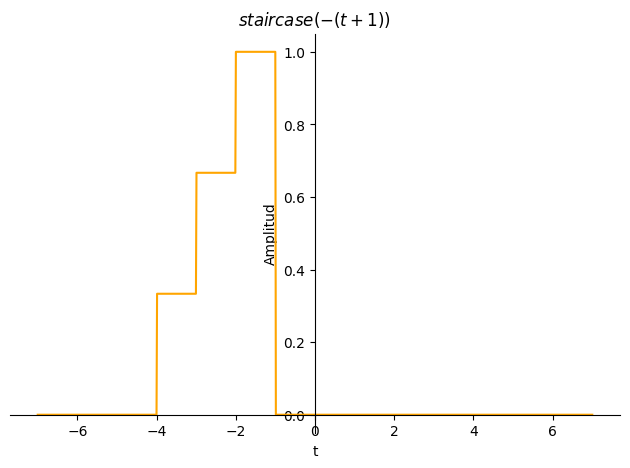

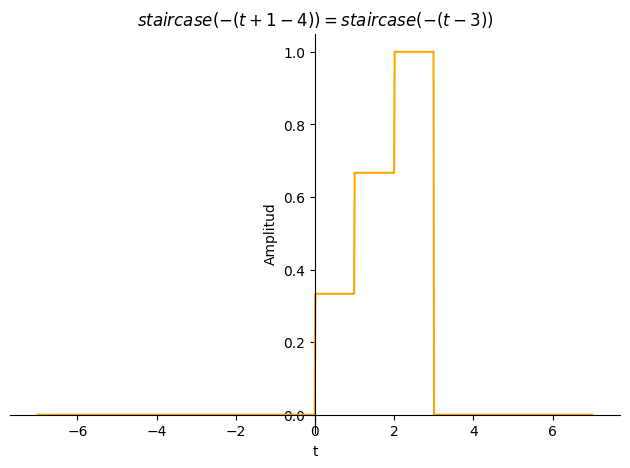

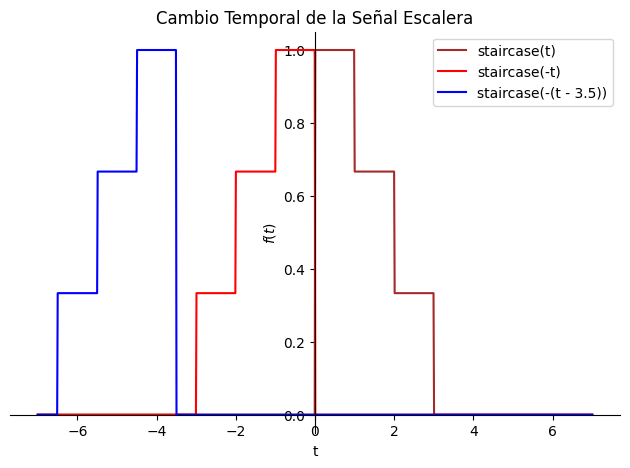

In [ ]:
# Definición del parámetro de desplazamiento temporal
tau = sp.symbols('tau', real=True)
tau = 1

# Escalera de ejemplo
staircase_ex = staircase.subs(t, -(t + tau))
sp.plot(staircase_ex, (t, -7, 7), title='$staircase(-(t + 1))$', ylabel='Amplitud', xlabel='t', line_color='orange')

# Desplazamiento temporal de la escalera de ejemplo para que inicie en t = 0
tau = -3 # 1 - 4
shifted_staircase = staircase.subs(t, -(t + tau))
sp.plot(shifted_staircase, (t, -7, 7), title='$staircase(-(t + 1 - 4)) = staircase(-(t - 3))$', ylabel='Amplitud', xlabel='t', line_color='orange')

# A partir de staircase(t), realizar el cambio temporal dividiendo en dos operaciones consecutivas:
#    - Inversión temporal.
#    - Desplazamiento temporal.
plots = sp.plot(staircase, (t, -7, 7), show=False, line_color='brown', legend=True, label='staircase(t)')

# Inversión temporal
inverted_staircase = staircase.subs(t, -t)
plots.extend(sp.plot(inverted_staircase, (t, -7, 7), show=False, line_color='red', legend=True, label='staircase(-t)'))

# Desplazamiento temporal
tau = 3.5
shifted_inverted_staircase = inverted_staircase.subs(t, t + tau)
plots.extend(sp.plot(shifted_inverted_staircase, (t, -7, 7), show=False, line_color='blue', legend=True, label='staircase(-(t - {tau}))'.format(tau=tau)))

plots.title = 'Cambio Temporal de la Señal Escalera'
plots.xlabel = 't'
plots.show()

#### 2.4. Evaluar la expersión $\int_{-\infty}^{\infty} t^{4} e^{-\cos(t)} \cos(-2t)\, \delta(2t - 5\pi)\, dt$.

- Consultar las propiedades de selectividad y escala en el tiempo de la función impulso unitario.
- Comprobar el resultado en simulación con la librería SymPy.


In [ ]:
import sympy as sp

# Definición de la variable independiente
t = sp.symbols('t', real=True)

# Definición del integrando
f_t = t**4 * sp.exp(-sp.cos(t)) * sp.cos(-2*t) * sp.DiracDelta(2*t - 5*sp.pi)

# Evaluación de la integral
F = sp.integrate(f_t, (t, -sp.oo, sp.oo))

# Simbólicamente:
F.simplify()


-625*pi**4/32

#### 2.5. Sea $x(t) = u(t - t_0) - u(t - nt_0) - 3k\delta(t - mt_0)$. Determine el valor de $k$ para el cual $\int_{-\infty}^{\infty} x(t) dt = A$ con $A \in \mathbb{R}$. Comprobar el resultado en simulación con la librería SymPy. 

In [ ]:
import sympy as sp
"""Sea $x(t) = u(t - t_0) - u(t - nt_0) - 3k\delta(t - mt_0)$. Determine el valor de $k$ para el cual $\int_{-\infty}^{\infty} x(t) dt = A$ con $A \in \mathbb{R}$. Comprobar el resultado en simulación con la librería SymPy."""
# Definición de la variable independiente
t = sp.symbols('t', real=True)

# Definición de los parámetros de la función
t_0, A = sp.symbols('t_0 A', real=True)
n, m, k = sp.symbols('n m k', integer=True)

# Definición de la función x(t)
x_t = sp.Heaviside(t - t_0) - sp.Heaviside(t - n*t_0) - 3*k*sp.DiracDelta(t - m*t_0)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\marti\AppData\Local\Temp\ipykernel_14108\4078728223.py:2: SyntaxWarning: invalid escape sequence '\d'
  """Sea $x(t) = u(t - t_0) - u(t - nt_0) - 3k\delta(t - mt_0)$. Determine el valor de $k$ para el cual $\int_{-\infty}^{\infty} x(t) dt = A$ con $A \in \mathbb{R}$. Comprobar el resultado en simulación con la librería SymPy."""


### 4. Discretización de señales

#### 4.1. Se pretende muestrear la señal $x(t) = 10cos(\Omega t)$ con $t \in [0, \Tau]$, $\Omega = 2\pi F$, $F = \frac{1}{\Tau}$ y $F = 50Hz$. Se emplea un sistema de discretización con frecuencia de muestreo $F_s = 80Hz$. Demuestre si el sistema utilizado es apropiado para la señal $x(t)$ y estime la señal capturada. Realice una simulación en Python del proceso de discretización.

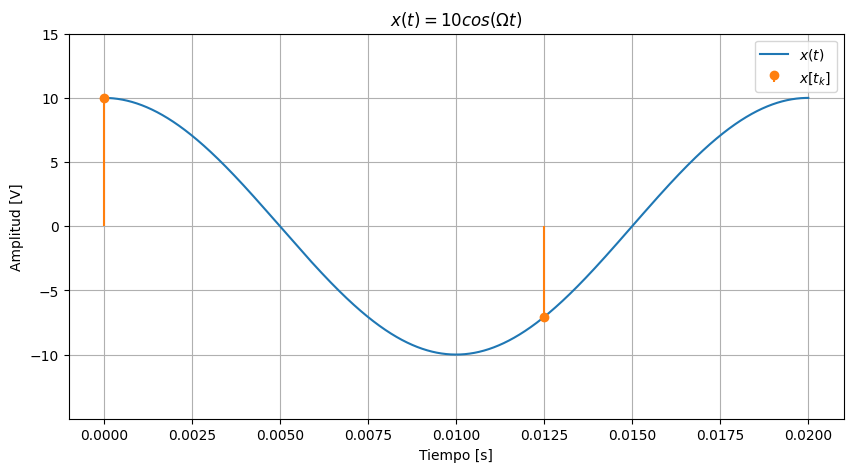

La señal muestreada no puede ser reconstruida correctamente debido a que la frecuencia de muestreo (Fs = 80.0 Hz) es menor que el doble de la frecuencia de la señal (2*Fo = 100.0 Hz), incumpliendo el Teorema de Nyquist.
Específicamente: F_s = 1.6 * F


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""Parámetros de la señal"""
A = 10.0       # Amplitud [V]
F = 50.0       # Frecuencia [Hz]
T = 1.0/F      # Periodo [s]

"""Muestreo"""
F_s = 80.0     # Frecuencia de muestreo [Hz]
T_s = 1.0/F_s  # Periodo de muestreo [s]

"""Tiempos [s]"""
sim_time = T                         # Tiempo de simulación (t ∈ [0, T])
t = np.linspace(0, sim_time, 20000)  # Tiempo continuo
t_k = np.arange(0, sim_time, T_s)    # Tiempo discreto

"""Señal original [V]"""
x_t = A*np.cos(2*np.pi*F*t)        # Señal continua
x_tk = A*np.cos(2*np.pi*F*t_k)     # Señal muestreada

"""Visualización"""
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label='$x(t)$', color='C0')
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.title('$x(t) = 10cos(\\Omega t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(min(x_t)-5, max(x_t)+5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

print(f"La señal muestreada no puede ser reconstruida correctamente debido a que la frecuencia de muestreo (Fs = {F_s} Hz) es menor que el doble de la frecuencia de la señal (2*Fo = {2*F} Hz), incumpliendo el Teorema de Nyquist.")
print("Específicamente: F_s =", F_s/F, "* F")

#### 4.2. Se tiene un sistema de discretización con frecuencia de muestreo $F_s = 40Hz$, aplicado a las señales $x_1(t) = cos(20\pi t)$ y $x_2(t) = cos(100\pi t)$. Las versiones discretizadas de las señales son distinguibles entre sí? Implemente una simulación en Python del proceso de discretización.

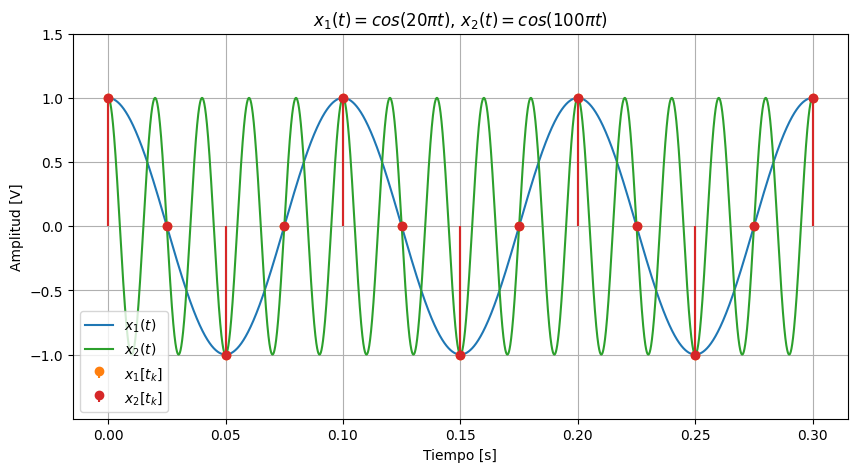

No se puede distinguir entre las dos señales muestreadas debido a que la frecuencia de muestreo (Fs = 40.0 Hz) es menor que el doble de la frecuencia de la segunda señal (2*Fo2 = 100.0 Hz), incumpliendo el Teorema de Nyquist.
De hecho, ambas señales discretas son exactaemente iguales. Por lo tanto, x_2[t_k] es una señal alias de x_1[t_k].


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""Parámetros de las señales"""
A_1 = 1.0        # Amplitud [V]
F_1 = 10.0       # Frecuencia [Hz] (20π rad/s => 10 Hz)
T_1 = 1.0/F_1    # Periodo [s]

A_2 = 1.0        # Amplitud [V]
F_2 = 50.0       # Frecuencia [Hz] (100π rad/s => 50 Hz)
T_2 = 1.0/F_2    # Periodo [s]

"""Muestreo"""
F_s = 40.0     # Frecuencia de muestreo [Hz]
T_s = 1.0/F_s  # Periodo de muestreo [s]

"""Tiempos [s]"""
sim_time = 3*max(T_1, T_2)           # Tiempo de simulación
t = np.linspace(0, sim_time, 20000)  # Tiempo continuo
t_k = np.arange(0, sim_time, T_s)    # Tiempo discreto

"""Señales originales [V]"""
x_1_t = A_1*np.cos(2*np.pi*F_1*t)     # Señal continua
x_1_tk = A_1*np.cos(2*np.pi*F_1*t_k)  # Señal muestreada

x_2_t = A_2*np.cos(2*np.pi*F_2*t)     # Señal continua
x_2_tk = A_2*np.cos(2*np.pi*F_2*t_k)  # Señal muestreada

"""Visualización"""
plt.figure(figsize=(10, 5))
plt.plot(t, x_1_t, label='$x_1(t)$', color='C0')
plt.stem(t_k, x_1_tk, label='$x_1[t_k]$', linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.plot(t, x_2_t, label='$x_2(t)$', color='C2')
plt.stem(t_k, x_2_tk, label='$x_2[t_k]$', linefmt='C3-', markerfmt='C3o', basefmt=" ")
plt.title('$x_1(t) = cos(20\\pi t)$, $x_2(t) = cos(100\\pi t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(min(x_1_t)-0.5, max(x_1_t)+0.5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

print(f"No se puede distinguir entre las dos señales muestreadas debido a que la frecuencia de muestreo (Fs = {F_s} Hz) es menor que el doble de la frecuencia de la segunda señal (2*Fo2 = {2*F_2} Hz), incumpliendo el Teorema de Nyquist.")
print("De hecho, ambas señales discretas son exactaemente iguales. Por lo tanto, x_2[t_k] es una señal alias de x_1[t_k].")

#### 4.3. ¿Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal $x(t) = 3cos(1000\pi t) + 5sin(6000\pi t) + 10cos(14000\pi t)$? Si se utiliza una frecuencia de muestreo de $5kHz$, ¿cuál es la señal discreta obtenida?

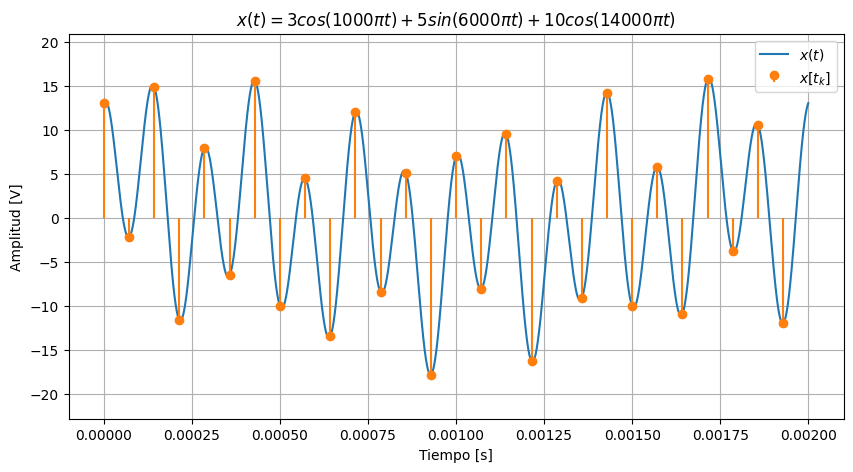

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
x(t) es el resultado de la superposición de
tres señales con los siguientes parámetros:
"""
A_1 = 3.0        # Amplitud [V]
F_1 = 500.0      # Frecuencia [Hz] (1000π rad/s => 500 Hz)
T_1 = 1.0/F_1    # Periodo [s]

A_2 = 5.0        # Amplitud [V]
F_2 = 3000.0     # Frecuencia [Hz] (6000π rad/s => 3000 Hz)
T_2 = 1.0/F_2    # Periodo [s]

A_3 = 10.0       # Amplitud [V]
F_3 = 7000.0     # Frecuencia [Hz] (14000π rad/s => 7000 Hz)
T_3 = 1.0/F_3    # Periodo [s]

F_max = max(F_1, F_2, F_3)  # Frecuencia máxima [Hz]

"""Muestreo"""
# Mínima frecuencia de muestreo según Teorema de Nyquist
F_s = 2*F_max    # Frecuencia de muestreo [Hz]

# F_s = 5kHz < 2*F_max = 14kHz => No se cumple el Teorema de Nyquist, ocurre aliasing
# F_s = 5000.0

T_s = 1.0/F_s    # Periodo de muestreo [s]

"""Tiempos [s]"""
sim_time = max(T_1, T_2, T_3)        # Tiempo de simulación
t = np.linspace(0, sim_time, 20000)  # Tiempo continuo
t_k = np.arange(0, sim_time, T_s)    # Tiempo discreto

"""Señal original [V]"""
x_t = A_1*np.cos(2*np.pi*F_1*t) + A_2*np.sin(2*np.pi*F_2*t) + A_3*np.cos(2*np.pi*F_3*t)         # Señal continua
x_tk = A_1*np.cos(2*np.pi*F_1*t_k) + A_2*np.sin(2*np.pi*F_2*t_k) + A_3*np.cos(2*np.pi*F_3*t_k)  # Señal muestreada

"""Visualización"""
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label='$x(t)$', color='C0')
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.title('$x(t) = 3cos(1000\\pi t) + 5sin(6000\\pi t) + 10cos(14000\\pi t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(min(x_t)-5, max(x_t)+5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

- Demuestre que funciones cosenoidales con frecuencia de oscilación $F_k = F_0 + kF_s$; con $k \in \mathbb{Z}$, no son distinguibles de la función $cos(2\pi F_0t)$ al utilizar un sistema de discretización con frecuencia de muestreo $F_s$. Realice simulaciones para $k \in$ {$0, \pm1, \pm2, \pm3$}

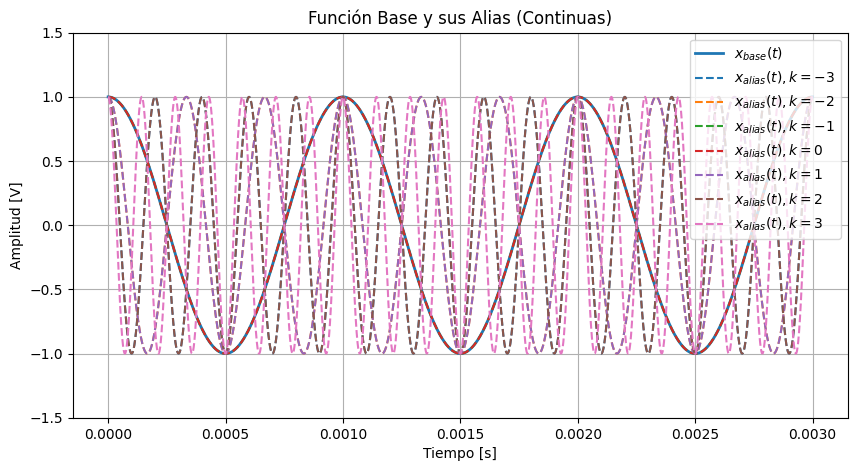

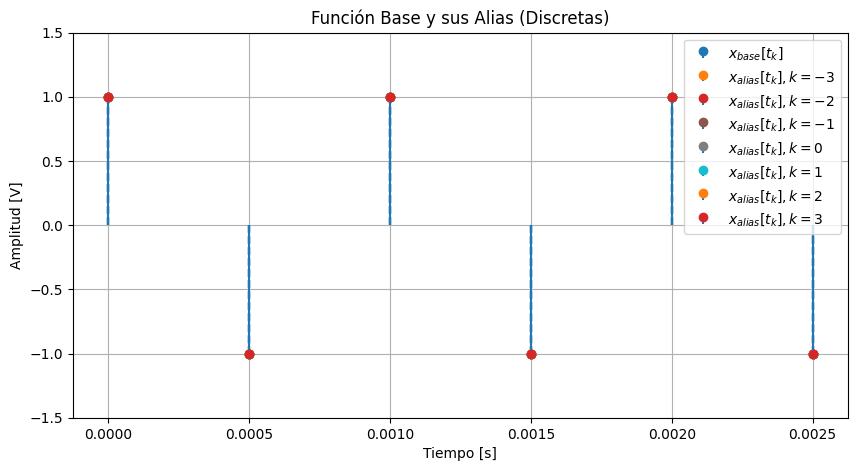

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función que devuelve una función cosenoidal con frecuencia de oscilación F_0 + k*F_s
def get_alias_function(F_0, F_s, k):
    F_k = F_0 + k*F_s
    return lambda t: np.cos(2*np.pi*F_k*t)

""" Parámetros de la función base """
A = 1.0        # Amplitud [V]
F_0 = 1000.0   # Frecuencia [Hz]
T_0 = 1.0/F_0  # Periodo [s]

""" Muestreo """
F_s = 2*F_0    # Frecuencia de muestreo [Hz]
T_s = 1.0/F_s  # Periodo de muestreo [s]
k_values = [-3, -2, -1, 0, 1, 2, 3]  # Valores de k para generar las señales alias

""" Tiempos [s] """
sim_time = 3*T_0                       # Tiempo de simulación (3 ciclos)
t = np.linspace(0, sim_time, 20000)    # Tiempo continuo
t_k = np.arange(0, sim_time, T_s)      # Tiempo discreto

""" Función base y sus alias """
x_base_t = A * np.cos(2 * np.pi * F_0 * t)                                # Función base (continua)
x_aliases_t = [A * get_alias_function(F_0, F_s, k)(t) for k in k_values]  # Funciones alias (continuas)

x_base_tk = A * np.cos(2 * np.pi * F_0 * t_k)                                # Función base (discreta)
x_aliases_tk = [A * get_alias_function(F_0, F_s, k)(t_k) for k in k_values]  # Funciones alias (discretas)

""" Visualización """
# Gráfica 1: Función base y sus alias (continuas)
plt.figure(figsize=(10, 5))
plt.plot(t, x_base_t, label='$x_{base}(t)$', color='C0', linewidth=2)
for k, x_alias_t in zip(k_values, x_aliases_t):
    plt.plot(t, x_alias_t, label=f'$x_{{alias}}(t), k={k}$', linestyle='--')
plt.title('Función Base y sus Alias (Continuas)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Gráfica 2: Función base y sus alias (discretas)
plt.figure(figsize=(10, 5))
plt.stem(t_k, x_base_tk, label='$x_{base}[t_k]$', linefmt='C0-', markerfmt='C0o', basefmt=" ")
for k, x_alias_tk in zip(k_values, x_aliases_tk):
    plt.stem(t_k, x_alias_tk, label=f'$x_{{alias}}[t_k], k={k}$', linefmt='--', markerfmt='o', basefmt=" ")
plt.title('Función Base y sus Alias (Discretas)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-1.5, 1.5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

### 5. Serie de Fourier

#### 5.1. Ejercicio en clase: Hallar la serie de Fourier de x(t)

⎧           0             for t ≥ -3.14159265358979 ∧ t < -1.5707963267949
⎪                                                                         
⎪0.636619772367581⋅t + 1          for t ≥ -1.5707963267949 ∧ t < 0        
⎪                                                                         
⎨1 - 0.636619772367581⋅t          for t ≥ 0 ∧ t < 1.5707963267949         
⎪                                                                         
⎪           0              for t ≥ 1.5707963267949 ∧ t ≤ 3.14159265358979 
⎪                                                                         
⎩          nan                               otherwise                    


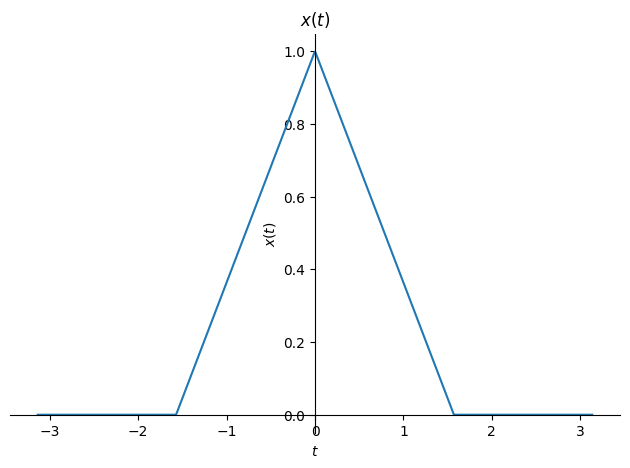

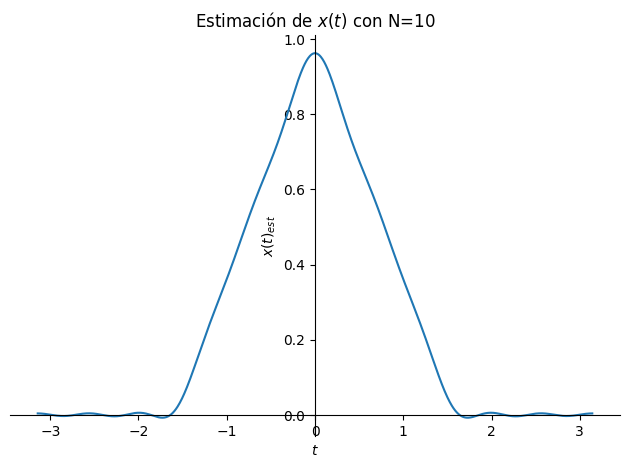

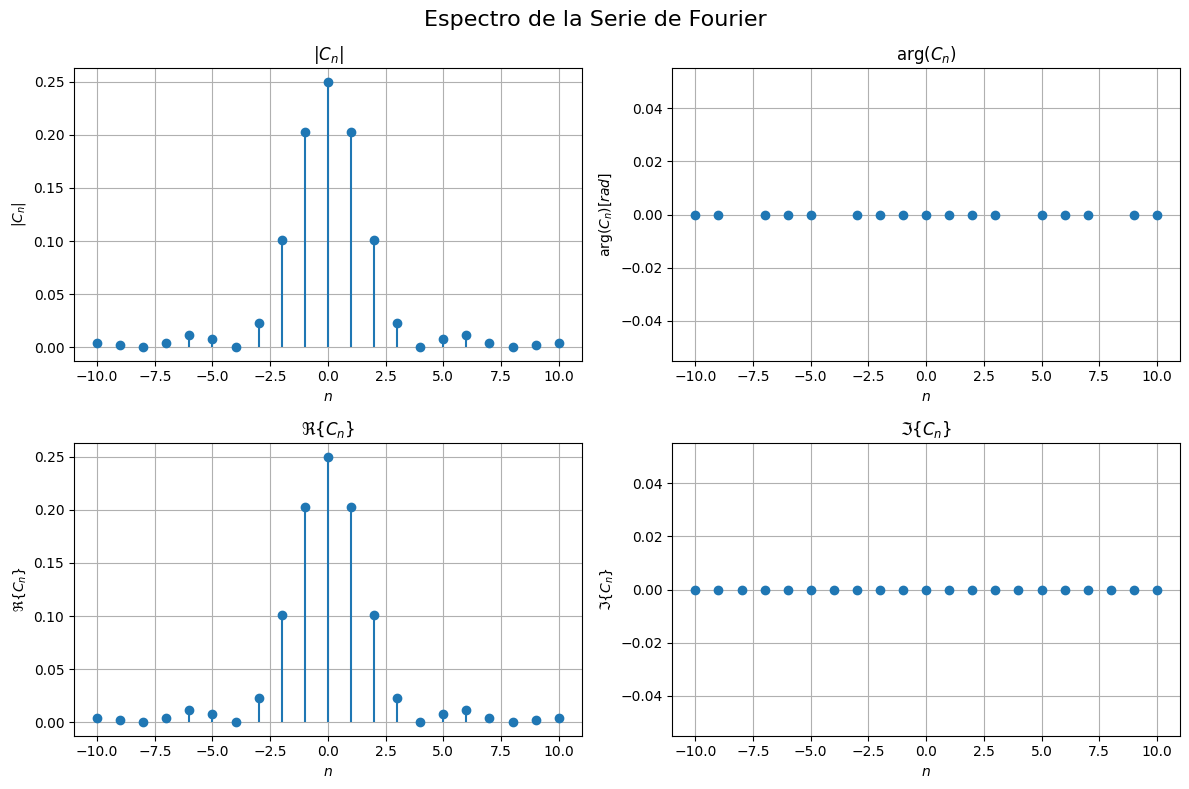

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

""" Parámetros de x(t) """
T = 2 * np.pi  # Periodo [s]
d = T / 4      # Duración del pulso [s]
B = 1          # Amplitud máxima
m = B / d      # Pendiente de la recta

""" Definición de la función x(t) """
t = sp.symbols('t', real=True)       # Variable independiente
n = sp.symbols('n', integer=True)    # Índice de la serie de Fourier

x_t = sp.Piecewise(
    (0, (t >= -T/2) & (t < -d)),     # x(t) = 0 si -T/2 <= t < -d
    (m*t + B, (t >= -d) & (t < 0)),  # x(t) = mt + B si -d <= t < 0
    (-m*t + B, (t >= 0) & (t < d)),  # x(t) = -mt + B si 0 <= t < d
    (0, (t >= d) & (t <= T/2))       # x(t) = 0 si d <= t <= T/2
)
x_t = sp.simplify(x_t)  # Simplificar la expresión
sp.pprint(x_t)          # Mostrar la función
sp.plot(x_t, (t, -T/2, T/2), title='$x(t)$', ylabel='$x(t)$', xlabel='$t$', grid=True)
plt.show()

""" Cálculo de los coeficientes de la serie de Fourier """
# Frecuencia angular fundamental
w_0 = 2 * np.pi / T

# Coeficiente C_0
C_0 = (1/T) * sp.integrate(x_t, (t, -T/2, T/2))

# Coeficientes C_n
C_n = (1/T) * sp.integrate(x_t * sp.exp(-sp.I * n * w_0* t), (t, -T/2, T/2))

""" Estimación de x(t) a partir de la serie de Fourier """
# Número de términos de la serie
N = 10

# Estimación de x(t) con N términos
x_t_est = C_0 + sum(C_n.subs(n, k) * sp.exp(sp.I * k * w_0 * t) for k in range(1, N+1)) + sum(sp.conjugate(C_n).subs(n, k) * sp.exp(-sp.I * k * w_0 * t) for k in range(1, N+1))
sp.plot(x_t_est, (t, -T/2, T/2), title=f'Estimación de $x(t)$ con N={N}', ylabel='$x(t)_{est}$', xlabel='$t$', grid=True)
plt.show()

""" Espectro de la serie de Fourier """
# |C_n|
abs_C_n = [sp.Abs(C_n.subs(n, k)).evalf() for k in range(-N, N+1)]

# Arg(C_n)
arg_C_n = [sp.arg(C_n.subs(n, k)).evalf() for k in range(-N, N+1)]

# Re{C_n}
real_C_n = [sp.re(C_n.subs(n, k)).evalf() for k in range(-N, N+1)]

# Im{C_n}
imag_C_n = [sp.im(C_n.subs(n, k)).evalf() for k in range(-N, N+1)]

# Figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Espectro de la Serie de Fourier', fontsize=16)
axs[0, 0].stem(range(-N, N+1), abs_C_n, basefmt=" ")
axs[0, 0].set_title('$|C_n|$')
axs[0, 0].set_xlabel('$n$')
axs[0, 0].set_ylabel('$|C_n|$')
axs[0, 0].grid()

axs[0, 1].stem(range(-N, N+1), arg_C_n, basefmt=" ")
axs[0, 1].set_title('$\\arg(C_n)$')
axs[0, 1].set_xlabel('$n$')
axs[0, 1].set_ylabel('$\\arg(C_n)  [rad]$')
axs[0, 1].grid()

axs[1, 0].stem(range(-N, N+1), real_C_n, basefmt=" ")
axs[1, 0].set_title('$\\Re\\{C_n\\}$')
axs[1, 0].set_xlabel('$n$')
axs[1, 0].set_ylabel('$\\Re\\{C_n\\}$')
axs[1, 0].grid()

axs[1, 1].stem(range(-N, N+1), imag_C_n, basefmt=" ")
axs[1, 1].set_title('$\\Im\\{C_n\\}$')
axs[1, 1].set_xlabel('$n$')
axs[1, 1].set_ylabel('$\\Im\\{C_n\\}$')
axs[1, 1].grid()

plt.tight_layout()